In [56]:
# Listing 3.12 page 78
# The Reuters dataset
from keras.datasets import reuters

In [57]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

c:\users\shinn\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\shinn\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [58]:
len(train_data)

8982

In [59]:
len(test_data)

2246

In [60]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [61]:
# Listing 3.13 page 78
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved
# indices for padding, start of sequence, and unknown
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [62]:
# The label associated with an example is an integer between 0 and 45 - a topic index:
train_labels[10]

3

In [63]:
# Listing 3.14 page79
# You can vectorize the data with the exact same code as in the previous example
import numpy as np

In [64]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [65]:
# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

In [66]:
# One-hot encoding is a widely used format for categorical data,
# also called categorical encoding
def to_one_hot (labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [67]:
# Vectorized trainning labels
one_hot_train_labels = to_one_hot(train_labels)

# Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [68]:
# Built in way to use one-hot encoding
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [69]:
# Listing 3.15 page 80
from keras import models
from keras import layers

In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [71]:
# Listing 3.16 page 80
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [72]:
# Listing 3.17 page 80
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [73]:
# Listing 3.18 page 81
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 3.1762 - accuracy: 0.4162 - val_loss: 1.8007 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.5328 - accuracy: 0.7074 - val_loss: 1.3219 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.1085 - accuracy: 0.7643 - val_loss: 1.1286 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8427 - accuracy: 0.8201 - val_loss: 1.0439 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6746 - accuracy: 0.8582 - val_loss: 0.9820 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5484 - accuracy: 0.8895 - val_loss: 0.9183 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.4295 - accuracy: 0.9131 - val_loss: 0.9076 - val_accuracy: 0.8090
Epoch 8/20
16

In [74]:
# Listing 3.19 page 81
import matplotlib.pyplot as plt

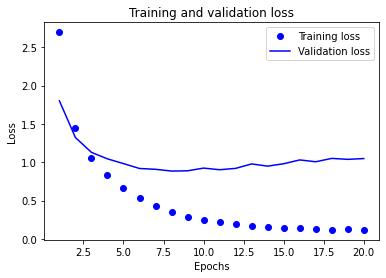

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

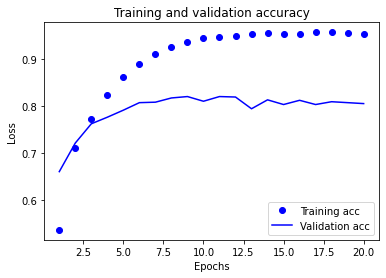

In [76]:
# Listing 3.20 page 81
# Clears the figure
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [77]:
# Listing 3.21 page 82
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 38ms/step - loss: 3.1114 - accuracy: 0.4133 - val_loss: 1.6965 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.4559 - accuracy: 0.6942 - val_loss: 1.3130 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 23ms/step - loss: 1.0902 - accuracy: 0.7630 - val_loss: 1.1383 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8312 - accuracy: 0.8224 - val_loss: 1.0442 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.6685 - accuracy: 0.8597 - val_loss: 0.9994 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 0s 24ms/step - loss: 0.5217 - accuracy: 0.8907 - val_loss: 0.9312 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4058 - accuracy: 0.9158 - val_loss: 0.9483 - val_accuracy: 0.8000
Epoch 8/9
16/16 [===

In [78]:
results

[0.9858776926994324, 0.7858415246009827]

In [79]:
# Listing 3.22 page 83
predictions = model.predict(x_test)

In [80]:
predictions[0].shape

(46,)

In [81]:
np.sum(predictions[0])

1.0000004

In [82]:
np.argmax(predictions[0])

3

In [83]:
# Listing 3.23 page 84
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.1805 - accuracy: 0.3333 - val_loss: 2.4495 - val_accuracy: 0.3570
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.2745 - accuracy: 0.3607 - val_loss: 2.0758 - val_accuracy: 0.4000
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.8167 - accuracy: 0.4247 - val_loss: 1.6362 - val_accuracy: 0.5500
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3708 - accuracy: 0.6440 - val_loss: 1.4166 - val_accuracy: 0.6480
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1276 - accuracy: 0.6948 - val_loss: 1.3801 - val_accuracy: 0.6760
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9920 - accuracy: 0.7422 - val_loss: 1.3779 - val_accuracy: 0.6810
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9003 - accuracy: 0.7666 - val_loss: 1.3387 - val_accuracy: 0.6960
Epoch 8/20
63